In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
df = pd.read_csv(r"/home/subham/Deep learning/AI/mastering_recurrent_neural_networks/Data/Stock_price_prediction/Stocks/a.us.txt",delimiter=',',usecols=['Date','Open','High','Low','Close'])

In [3]:
df.head()

,Date,Open,High,Low,Close
0,1999-11-18,30.713,33.754,27.002,29.702
1,1999-11-19,28.986,29.027,26.872,27.257
2,1999-11-22,27.886,29.702,27.044,29.702
3,1999-11-23,28.688,29.446,27.002,27.002
4,1999-11-24,27.083,28.309,27.002,27.717


In [4]:
df = df.sort_values('Date')
df.head()

,Date,Open,High,Low,Close
0,1999-11-18,30.713,33.754,27.002,29.702
1,1999-11-19,28.986,29.027,26.872,27.257
2,1999-11-22,27.886,29.702,27.044,29.702
3,1999-11-23,28.688,29.446,27.002,27.002
4,1999-11-24,27.083,28.309,27.002,27.717


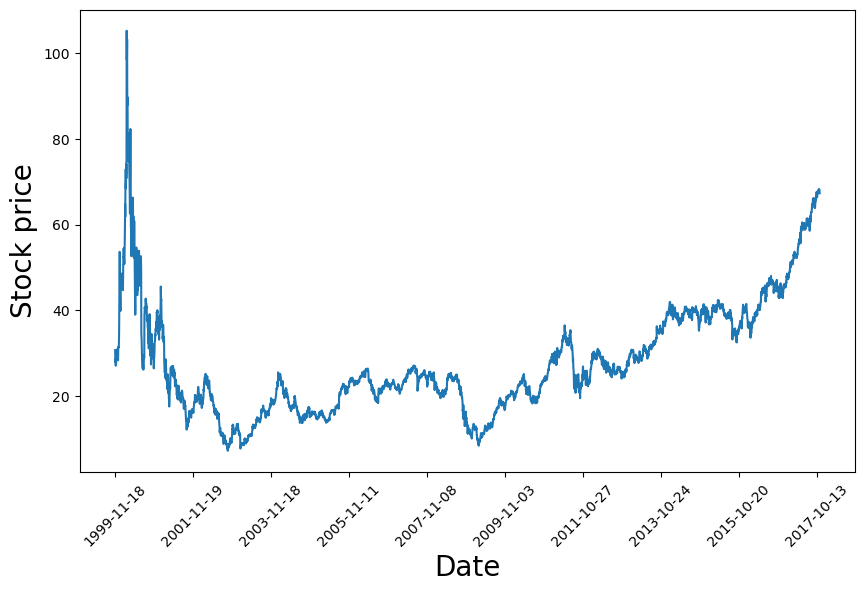

In [5]:
fig = plt.figure(figsize=(10,6))
plt.plot(range(df.shape[0]),df['Open'])
plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Stock price',fontsize = 20)
plt.show()

In [6]:
O = df.iloc[:,1:2].values

In [7]:
O.shape

(4521, 1)

In [8]:
Tr = O[:4000]
Te = O[4000:]

In [9]:
Tr.shape

(4000, 1)

In [10]:
Te.shape

(521, 1)

In [11]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [12]:
sc = MinMaxScaler(feature_range=(0,1))

In [13]:
tr_scaled = sc.fit_transform(Tr)
ts_scaled = sc.transform(Te)

In [14]:
seq_length = 100
X_train = []
y_train = []
for i in range(seq_length,len(tr_scaled)-seq_length):
    X_train.append(tr_scaled[i-seq_length:i,0])
    y_train.append(tr_scaled[i,0])

In [15]:
seq_length = 100
X_test = []
y_test = []
for i in range(seq_length,len(ts_scaled)-seq_length):
    X_test.append(ts_scaled[i-seq_length:i,0])
    y_test.append(ts_scaled[i,0])

In [17]:
X_train,y_train = np.array(X_train),np.array(y_train)

In [18]:
X_train

array([[0.23950492, 0.22189629, 0.2106806 , ..., 0.66629247, 0.76603053,
        0.62151128],
       [0.22189629, 0.2106806 , 0.21885786, ..., 0.76603053, 0.62151128,
        0.60086422],
       [0.2106806 , 0.21885786, 0.20249315, ..., 0.62151128, 0.60086422,
        0.53204067],
       ...,
       [0.33384926, 0.33562337, 0.33454259, ..., 0.34867436, 0.34936769,
        0.34637004],
       [0.33562337, 0.33454259, 0.32602886, ..., 0.34936769, 0.34637004,
        0.34847043],
       [0.33454259, 0.32602886, 0.32096141, ..., 0.34637004, 0.34847043,
        0.34637004]])

In [19]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [20]:
X_train.shape

(3800, 100, 1)

In [21]:
X_test,y_test = np.array(X_test),np.array(y_test)

In [22]:
X_test.shape

(321, 100)

In [23]:
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [24]:
X_test.shape

(321, 100, 1)

In [34]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.1))
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.2))
model.add(tf.keras.layers.GRU(50))
model.add(Dropout(0.2))
model.add(Dense(1))

/home/subham/.conda/envs/train_dl/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [35]:
model.compile(optimizer='adam',loss=tf.keras.losses.MSE)

In [36]:
model.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0057
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 7.7253e-04
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 6.7807e-04
Epoch 4/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.5603e-04
Epoch 5/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.8083e-04
Epoch 6/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.3310e-04
Epoch 7/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.7565e-04
Epoch 8/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.4593e-04
Epoch 9/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.4851e-04
Epoch 10/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.8520e-04
Epoch 11/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.6330e-04
Epoch 12/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.2917e-04
Epoch 13/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.3970e-04
Epoch 14/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 3.

In [37]:
y_hat = model.predict(X_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [38]:
y_hat.shape

(321, 1)

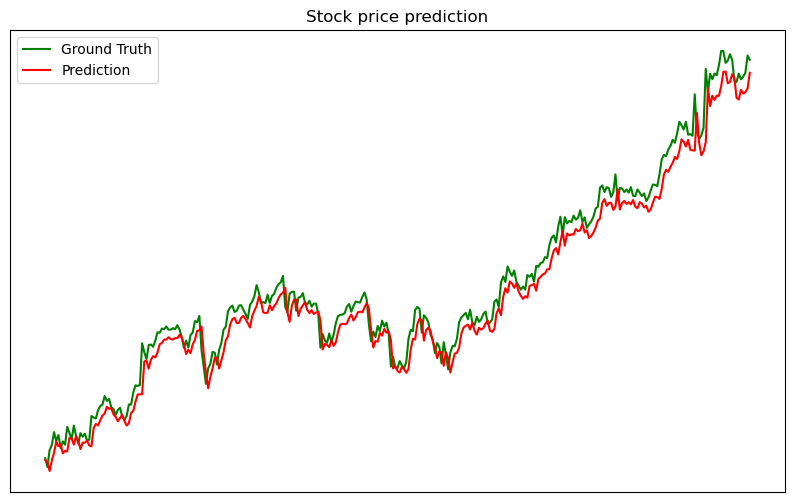

In [40]:
fig = plt.figure(figsize=(10,6))
plt.plot(y_test,color='green',label='Ground Truth')
plt.plot(y_hat,color='red',label='Prediction')
plt.xticks([])
plt.yticks([])
plt.title("Stock price prediction")
plt.legend()
plt.show()